# The Sparks Foundation: Orientation for Graduate Rotational Internship Program

## Data science and business Analytics :
## Task 1 :

## Prediction Using Supervised ML

### Author: Sanjay Kumar Yadav

### Reading and Understanding the Data

In [2]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [6]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [7]:
# Check the 5 rows of the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


###  Data overview

In [8]:
#Check the shape of dataset
data.shape

(25, 2)

In [9]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
# Describe Dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


This way we can quickly see basic metrics like average, median, percentile for different features.

### Data Cleaning

Data cleaning is one of the important parts of machine learning. It plays a significant part in building a model. It surely isn’t the fanciest part of machine learning and at the same time, there aren’t any hidden tricks or secrets to uncover.

If we have a well-cleaned dataset, there are chances that we can get achieve good results with simple algorithms also, which can prove very beneficial at times especially in terms of computation when the dataset size is large. 

In [11]:
#Look for missing values / Null values

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [12]:
# Checking for duplicate
data.duplicated().sum()

0

Observations:

1. Data size is (25, 2).

2. None of the columns has Null values.

3. There is 0 duplicated value in this dataset .

4. All Columns has numerical values .



### Exploratory Data Analytics


#### Visualising Numeric Variables

Let's make a dist plot of all the numeric variables

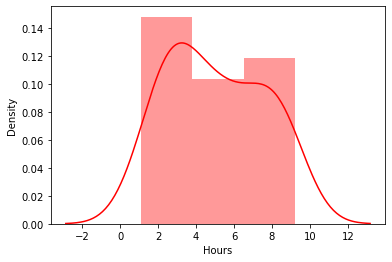

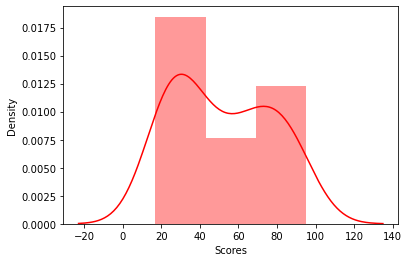

In [16]:
df_numerics_only = data.select_dtypes(include=np.number)
for column in df_numerics_only.columns:
    
    sns.distplot(data[column],color="red") # Stack these distributions together with different colors 
    plt.show()


Observations:

The Distplot of Hours ,and Score column are approximately same distributed. 

### Box plots of Hours and Scores

Box plots are a visual method to identify outliers. Box plots is one of the many ways to visualize data distribution. 

<AxesSubplot:xlabel='Hours'>

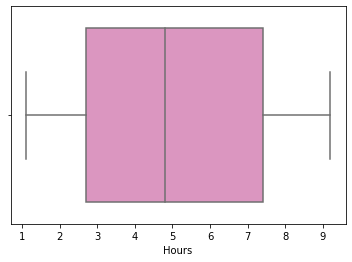

In [33]:
sns.boxplot(data['Hours'],palette='Set2_r')

<AxesSubplot:xlabel='Scores'>

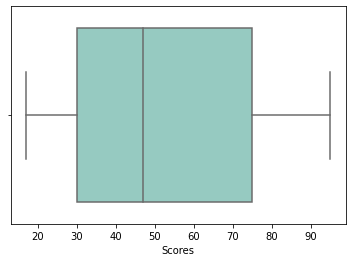

In [35]:
sns.boxplot(data['Scores'], palette='Set3')

Observations  :
1. Hours have an average value of 5.01, a minimum value of 1.1, and a maximum value of 9.2.
2. The average value, minimum value and maximum value of score are  51.48 ,17 and 95.

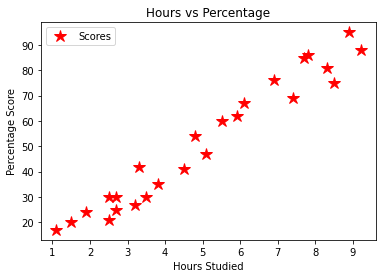

In [80]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='*',markersize = 12,color='red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Data Spliting

Splitting the dataset is the next step in data preprocessing in machine learning. Every dataset for Machine Learning model must be split into two separate sets – training set and test set. 

Training set denotes the subset of a dataset that is used for training the machine learning model. A test set, on the other hand, is the subset of the dataset that is used for testing the machine learning model. The ML model uses the test set to predict outcomes. 

Here, the second line splits the arrays of the dataset into random train and test subsets. Here includes four variables:

x_train – features for the training data

x_test – features for the test data

y_train – dependent variables for training data

y_test – independent variable for testing data

In [41]:
#split dataset in features and target variable
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [68]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=12)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((17, 1), (8, 1), (17,), (8,))

### Model Building

Machine Learning models can be understood as a program that has been trained to find patterns within new data and make predictions. These models are represented as a mathematical function that takes requests in the form of input data, makes predictions on input data, and then provides an output in response.

First, these models are trained over a set of data, and then they are provided an algorithm to reason over data, extract the pattern from feed data and learn from those data. Once these models get trained, they can be used to predict the unseen dataset.

### Linear Regression 

In [69]:
# Import Linear Regression 
from sklearn.linear_model import LinearRegression 

# instantiate the Regression 
regressor = LinearRegression()  

# fit the model
regressor.fit(X_train, y_train)

LinearRegression()

In [70]:
#Predicting the test set result  
y_pred= regressor.predict(X_test)

In [71]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,69,74.973657
1,60,56.401478
2,67,62.266376
3,47,52.491545
4,95,89.635904
5,81,83.771005
6,30,36.851815
7,17,13.392220


### Finding best fit line

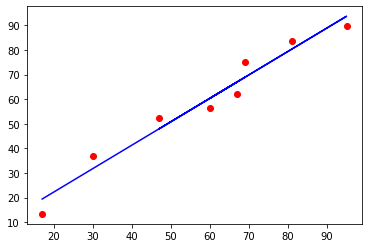

In [74]:
#find line of best fit
a, b = np.polyfit(y_test,y_pred, 1)

#add points to plot
plt.scatter(y_test,y_pred,c="r")

#add line of best fit to plot
plt.plot(y_test, a*y_test+b,c="b") 

### Evaluating the model



In [72]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
      

Mean Absolute Error: 4.79900554865473


#### The model mean Absolute Error is 4.79. 

### What will be the predicted score if a student studies for 9.25 hours per day?

In [87]:
input_data = 9.25

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print("Score : ",prediction)



Score :  [93.0570949]


#### According to this model if a student studies for 9.25 hours per day the score will be 93.05.